### Курсовой проект по курсу Анализ временных рядов: "Моделирование временного ряда"

Загрузите данные по курсам акций Сбербанка за 2020-2021 год и сделайте предсказание курса на январь 2022.

Используйте ансамбль из LSTM/GRU, SARIMA и любых других моделей, которые покажут достаточную точность. Сравните предсказание с фактическими данными.

Дополнительно можно использовать любые другие серии данных (макроэкономических показателей), если они позволяют уточнить прогноз.

Выложите решение в своем репозитории на GitHub и приложите на него ссылку.

Данные: https://video.ittensive.com/time-series/ittensive.time.series.04.csv

# -------------------------------------------------------------------------------
### 1. Подключаем необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU

E:\anaconda\envs\nerual_networks\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\anaconda\envs\nerual_networks\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\anaconda\envs\nerual_networks\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\anaconda\envs\nerual_networks\lib\site-packages\tensorflow\python\framework\dty

### 2. Создаём необходимые функции

In [2]:
def smape(A, F):
    return 100*np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))
def getdata(data_x, data_y, lookback):
    X, Y = [], []
    for i in range(len(data) - lookback + 1 - start_shift):
        X.append(data_x[i:i+lookback])
        Y.append(data_y[i+lookback-1])
    return np.array(X), np.array(Y).reshape(-1, 1)

### 3. Подключаем данные, именнуем серии данных, дату приводим к datetime и сортируем по ней

In [3]:
data = pd.read_csv("E:/ittensive/Time series analysis/ittensive.time.series.04A.csv", delimiter=";" ,
                   decimal = ',', names=["Дата", "Открытие", "Макс","Мин", "Закрытие"])


In [4]:
data["Закрытие"] = data["Закрытие"].astype('float')
data["Дата"] = pd.to_datetime(data["Дата"])
data = data.sort_values('Дата')

In [5]:
data.head(10)

,Дата,Открытие,Макс,Мин,Закрытие
60,2020-01-04,183.20,185.47,182.00,184.78
101,2020-01-06,203.10,205.93,201.81,203.66
166,2020-01-09,226.70,227.97,226.01,227.62
196,2020-01-10,229.08,229.90,226.86,226.90
227,2020-01-11,203.62,204.84,200.61,200.99
256,2020-01-12,250.75,260.99,249.80,260.69
5,2020-01-13,258.30,262.40,257.15,262.40
6,2020-01-14,262.50,263.22,258.62,259.05
7,2020-01-15,258.49,258.91,254.21,256.31
8,2020-01-16,257.11,259.51,256.10,257.51


# модель SARIMA


### В качестве целевой переменной которую мы будем предсказывать у нас будет курс акций сбербанка на момент закрытия

In [6]:
x = data["Закрытие"]

In [8]:
#Выбираем наилучшие коэффициенты
aic_best = 1e10
coeff_best = (1, 1, 1)
for p in range(1,5):
    for d in range(1,5):
        for q in range(1,5):
            model_ = SARIMAX(x[100:], order=(p, d, q), seasonal_order=(1, 1, 1, 24)).fit()
            aic = model_.aic
            print ("Тестируем", p, d, q, "результат:", aic)
            if aic < aic_best:
                coeff_best = (p, d, q)
                aic_best = aic
print ("Наилучшие коффициенты:", coeff_best)

E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 1 1 1 результат: 4435.223393522365


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 1 1 2 результат: 4435.924144832366


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 1 1 3 результат: 4432.219202422196


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 1 1 4 результат: 4432.235693165204


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 1 2 1 результат: 4496.412739329823


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 1 2 2 результат: 4504.53964821957


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 1 2 3 результат: 4441.021018726562


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 1 2 4 результат: 4456.957523670687


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Тестируем 1 3 1 результат: 4793.6015994234


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 1 3 2 результат: 4502.346051867218


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 1 3 3 результат: 4509.699137083755


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 1 3 4 результат: 4492.346630518463


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 1 4 1 результат: 5209.625291143804


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 1 4 2 результат: 4795.641706106561


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 1 4 3 результат: 4912.359396635957


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 1 4 4 результат: 4531.536861652869


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 2 1 1 результат: 4436.423394697222


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 2 1 2 результат: 4431.518831272574


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 2 1 3 результат: 4432.009037423744


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 2 1 4 результат: 4433.395834470956


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 2 2 1 результат: 4465.025342920155


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 2 2 2 результат: 4456.579444147194


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 2 2 3 результат: 4440.066083189838


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 2 2 4 результат: 4441.608983227694


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 2 3 1 результат: 4687.012567977488


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 2 3 2 результат: 4474.279128621931


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 2 3 3 результат: 4501.521595660927


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 2 3 4 результат: 4511.248836001465


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 2 4 1 результат: 5041.137333947737


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 2 4 2 результат: 4693.796598176084


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 2 4 3 результат: 4792.954920757967


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 2 4 4 результат: 4535.954775014476


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 3 1 1 результат: 4431.062051134759


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Тестируем 3 1 2 результат: 4432.478234756654


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 3 1 3 результат: 4436.567517554486


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 3 1 4 результат: 4438.548124662844


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 3 2 1 результат: 4463.168555351958


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 3 2 2 результат: 4467.320676358018


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 3 2 3 результат: 4484.6104610153125


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 3 2 4 результат: 4439.728663862475


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 3 3 1 результат: 4630.470623689797


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 3 3 2 результат: 4690.233335639657


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 3 3 3 результат: 4475.043695353237


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 3 3 4 результат: 4460.682533967142


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 3 4 1 результат: 4940.266289061581


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 3 4 2 результат: 5045.14895055643


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 3 4 3 результат: 4704.492211383373


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 3 4 4 результат: 4497.922356202391


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 4 1 1 результат: 4432.983311578036


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 4 1 2 результат: 4432.874533083982


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 4 1 3 результат: 4434.8276681691


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 4 1 4 результат: 4425.93948588692


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 4 2 1 результат: 4463.537098307323


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 4 2 2 результат: 4464.712736913151


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 4 2 3 результат: 4460.636125267174


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 4 2 4 результат: 4433.2984208531125


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 4 3 1 результат: 4581.879616303455


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 4 3 2 результат: 4493.725909529461


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 4 3 3 результат: 4472.928715480674


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 4 3 4 результат: 4475.205783288461


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 4 4 1 результат: 4825.057991219462


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 4 4 2 результат: 4588.79814505596


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 4 4 3 результат: 4639.453751236613


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 4 4 4 результат: 4695.425504731964
Наилучшие коффициенты: (4, 1, 4)


In [10]:
# Находим наилучшие сезонные коэффициенты
aic_best = 1e10
seasonal_coeff_best = (1, 1, 1, 24)
for P in range(1,3):
    for D in range(1,4):
        for Q in range(1,3):
            model_ = SARIMAX(x[100:], order=coeff_best, seasonal_order=(P, D, Q, 24)).fit()
            aic = model_.aic
            print ("Тестируем", P, D, Q, "результат:", aic)
            if aic < aic_best:
                seasonal_coeff_best = (P, D, Q, 24)
                aic_best = aic
print ("Наилучшие сезонные коффициенты:", seasonal_coeff_best)

E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 1 1 1 результат: 4425.93948588692


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 1 1 2 результат: 4429.556109914451


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 1 2 1 результат: 4494.698330537406


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 1 2 2 результат: 4413.515644533207


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 1 3 1 результат: 22.0


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 1 3 2 результат: 4640.888110074146


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 2 1 1 результат: 4427.371500329134


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 2 1 2 результат: 4432.983990645126


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 2 2 1 результат: 4453.584290908606


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 2 2 2 результат: 26.0


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Тестируем 2 3 1 результат: 24.0


E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Тестируем 2 3 2 результат: 4586.411264173235
Наилучшие сезонные коффициенты: (1, 3, 1, 24)


### 4. Строим модель SARIMA и делаем предсказние

In [11]:
model_sarima = SARIMAX(x, order=coeff_best, seasonal_order=seasonal_coeff_best).fit()
forecast_sarima = model_sarima.get_forecast(steps=len(x)).predicted_mean

E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
E:\anaconda\envs\nerual_networks\lib\site-packages\statsmodels\tsa\base\tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


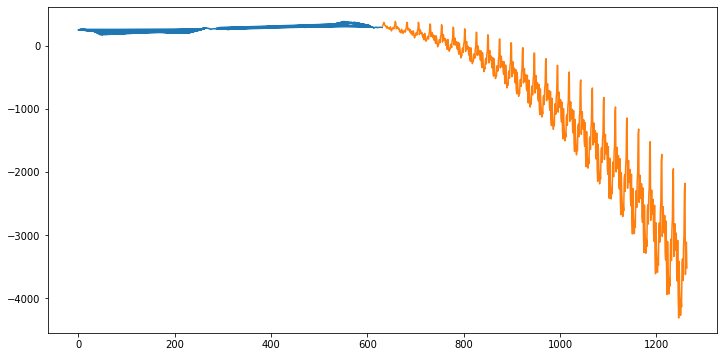

In [12]:
#plt.figure(figsize=(12, 6))
#plt.plot(x)
#plt.plot(forecast_sarima)
#plt.show()

In [168]:
#model_smape = smape(data["Закрытие"], forecast_sarima)
#print ("Ошибка модели:", model_smape)

# модель LSTM

In [14]:
#Увеличиваем количество признаков, за счёт добавление производных 1 - 5 порядков
data["WD"] = data["Дата"].dt.weekday
start_shift = 5
for i in range(1, start_shift+1):
    data["Закрытие" + str(i)] = data["Закрытие"].shift(i)
data = data.sort_values('Дата')
data.head()

,Дата,Открытие,Макс,Мин,Закрытие,WD,Закрытие1,Закрытие2,Закрытие3,Закрытие4,Закрытие5
60,2020-01-04,183.20,185.47,182.00,184.78,5,NaN,NaN,NaN,NaN,NaN
101,2020-01-06,203.10,205.93,201.81,203.66,0,184.78,NaN,NaN,NaN,NaN
166,2020-01-09,226.70,227.97,226.01,227.62,3,203.66,184.78,NaN,NaN,NaN
196,2020-01-10,229.08,229.90,226.86,226.90,4,227.62,203.66,184.78,NaN,NaN
227,2020-01-11,203.62,204.84,200.61,200.99,5,226.90,227.62,203.66,184.78,NaN


In [15]:
x_columns = ["Закрытие1", "Закрытие2", "Закрытие3", "Закрытие4", "Закрытие5", "WD"]
y_columns = ["Закрытие"]

#выполняем нормализацию для наборов данных
scaler_x = StandardScaler()
scaler_y = StandardScaler()
x_scaled = scaler_x.fit_transform(data[x_columns][start_shift:])
y_scaled = scaler_y.fit_transform(data[y_columns][start_shift:])

In [16]:
lookback = 10
x, y = getdata(x_scaled, y_scaled, lookback)
x = x.reshape(x.shape[0], x.shape[1], x.shape[2])

### 5. Создаём модель LSTM

In [17]:
batch_size=1
model = Sequential()
model.add(LSTM(10, stateful=True, batch_input_shape=(batch_size, x.shape[1], x.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (1, 10)                   680       
_________________________________________________________________
dense (Dense)                (1, 1)                    11        
Total params: 691
Trainable params: 691
Non-trainable params: 0
_________________________________________________________________


### 6. Обучение модели LSTM

In [18]:
model.fit(x, y, epochs=50, batch_size=batch_size)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50
618/618 [==============================] - 3s 5ms/sample - loss: 0.2712
Epoch 2/50
618/618 [==============================] - 2s 3ms/sample - loss: 0.2071
Epoch 3/50
618/618 [==============================] - 3s 5ms/sample - loss: 0.1881
Epoch 4/50
618/618 [==============================] - 3s 4ms/sample - loss: 0.1721
Epoch 5/50
618/618 [==============================] - 2s 3ms/sample - loss: 0.1615
Epoch 6/50
618/618 [==============================] - 3s 4ms/sample - loss: 0.1530
Epoch 7/50
618/618 [==============================] - 2s 3ms/sample - loss: 0.1478
Epoch 8/50
618/618 [==============================] - 2s 3ms/sample - loss: 0.1429
Epoch 9/50
618/618 [==============================] - 3s 4ms/sample - loss: 0.1406
Epoch 10/50
618/618 [==============================] - 2s 3ms/sample - loss: 0.1344
Epoch 11/50
618/618 [==============================] - 2s 3ms/sample - loss

### 7. Построение прогноза LSTM

In [19]:
y_test = scaler_y.inverse_transform(y)

#Совершаем предсказание
forecast_LSTM =  scaler_y.inverse_transform(model.predict(x, batch_size=batch_size))

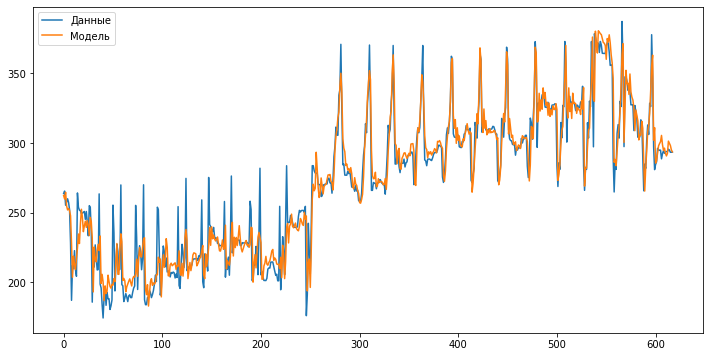

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(y_test)
plt.plot(forecast_LSTM)
plt.legend(labels=["Данные", "Модель"])
plt.show()

In [21]:
model_smape = smape(y_test, forecast_LSTM)
print ("Ошибка модели:", model_smape)

Ошибка модели: 2237.1967466269057


# --------------------------------------------------------------

# модель GRU

In [23]:
#Создаём модель
batch_size=1
model = Sequential()
model.add(GRU(10, stateful=True, batch_input_shape=(batch_size, x.shape[1], x.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (1, 10)                   510       
_________________________________________________________________
dense_1 (Dense)              (1, 1)                    11        
Total params: 521
Trainable params: 521
Non-trainable params: 0
_________________________________________________________________


### 8. Обучение модели GRU

In [24]:
model.fit(x, y, epochs=50, batch_size=batch_size)

Epoch 1/50
618/618 [==============================] - 2s 4ms/sample - loss: 0.2705
Epoch 2/50
618/618 [==============================] - 1s 2ms/sample - loss: 0.1635
Epoch 3/50
618/618 [==============================] - 2s 3ms/sample - loss: 0.1487
Epoch 4/50
618/618 [==============================] - 2s 4ms/sample - loss: 0.1426
Epoch 5/50
618/618 [==============================] - 2s 4ms/sample - loss: 0.1357
Epoch 6/50
618/618 [==============================] - 2s 3ms/sample - loss: 0.1361
Epoch 7/50
618/618 [==============================] - 2s 3ms/sample - loss: 0.1261
Epoch 8/50
618/618 [==============================] - 2s 4ms/sample - loss: 0.1276
Epoch 9/50
618/618 [==============================] - 2s 3ms/sample - loss: 0.1251
Epoch 10/50
618/618 [==============================] - 2s 3ms/sample - loss: 0.1227
Epoch 11/50
618/618 [==============================] - 2s 3ms/sample - loss: 0.1213
Epoch 12/50
618/618 [==============================] - 2s 3ms/sample - loss: 0.1231
E

### 9. Построение прогноза GRU

In [25]:
y_test = scaler_y.inverse_transform(y)
forecast_GRU = scaler_y.inverse_transform(model.predict(x, batch_size=batch_size))

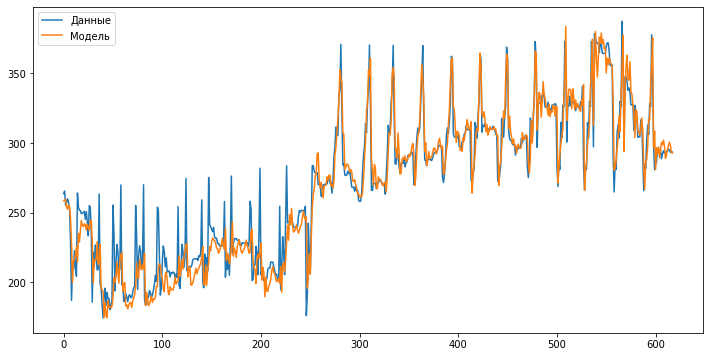

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(y_test)
plt.plot(forecast_GRU)
plt.legend(labels=["Данные", "Модель"])
plt.show()

In [27]:
model_smape = smape(y_test, forecast_GRU)
print ("Ошибка модели:", model_smape)

Ошибка модели: 2413.231895675957


# Создание ансамбля

In [158]:
#Приводим прогноз модели SARIMA к массиву numpy
forecast_sarima_np = forecast_sarima.to_numpy()
forecast_sarima_np = forecast_sarima_np.reshape(len(forecast_sarima), 1)

In [159]:
#усредняям результаты трёх прогнозов
ensemble = (forecast_sarima_np[0:618] + forecast_LSTM + forecast_GRU) / 3

### 10. Выводим прогноз круса акций сбербанка в момент закрытия на январь 2022 года, и для сравнения курс изначальные данные по курсы

In [160]:
date = data[data['Дата'] < '2020-02-01']
date = date['Дата']
date_2021 = date + pd.DateOffset(years=2)

In [161]:
series = pd.DataFrame(data=ensemble[0:21])

In [162]:
date_2022 = date_2022.reset_index()

In [ ]:
last_year = data[data['Дата'] < '2020-02-01']
last_year = last_year.reset_index()
last_year = last_year.set_index('Дата') 
np_data = last_year['Закрытие'].to_numpy()
np_data = np_data.reshape(len(np_data), 1)

In [165]:
result = pd.DataFrame({"Дата": date_2022['Дата'], "Прогноз ЯНВ 2022":series[0], "ЯНВ 2020": np_data})
result = result.set_index('Дата')

In [166]:
result

,Прогноз ЯНВ 2022,ЯНВ 2020
Дата,,
2022-01-04,279.616864,184.78
2022-01-06,286.090297,203.66
2022-01-09,298.490786,227.62
2022-01-10,292.256367,226.90
2022-01-11,279.008816,200.99
2022-01-12,275.643561,260.69
2022-01-13,274.120999,262.40
2022-01-14,266.463553,259.05
2022-01-15,246.204148,256.31


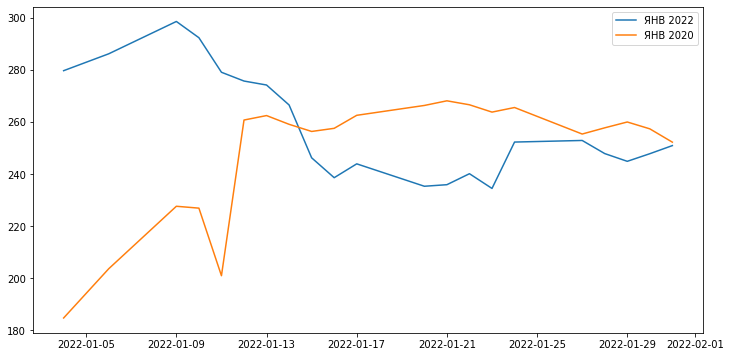

In [167]:
plt.figure(figsize=(12, 6))
plt.plot(result)
plt.legend(labels=["ЯНВ 2022", "ЯНВ 2020"])
plt.show()